# Universal Style Transfer via Feature Transforms

In [12]:
from utils import get_img, resize_to
from stylize import stylize
from train import train_decoder

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

## Style Transform

### Load images 

First we load the content and sytle images

Text(0.5, 1.0, 'style image')

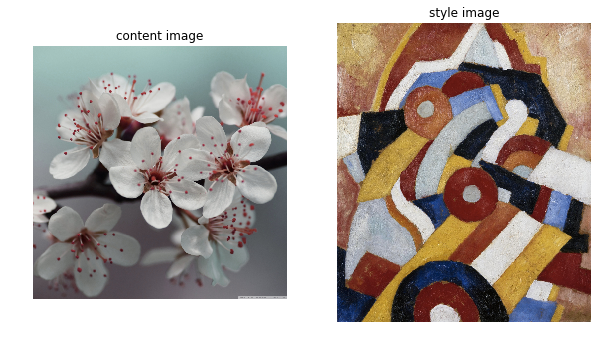

In [9]:
img = resize_to(get_img('samples/content2.jpg'), 512)
style = resize_to(get_img('samples/style2.jpg'), 512)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title('content image')
axes[1].imshow(style)
axes[1].axis('off')
axes[1].set_title('style image')

### Style Transfer

Here we run the style transfer on `relu1_1`, `relu2_1`, `relu3_1`, `relu4_1`, and `relu5_1` five layers sequentially, with alpha of 0.6:

INFO:tensorflow:Restoring parameters from models/decoder_relu1_1/decoder_relu1_1.ckpt
INFO:tensorflow:Restoring parameters from models/decoder_relu2_1/decoder_relu2_1.ckpt
INFO:tensorflow:Restoring parameters from models/decoder_relu3_1/decoder_relu3_1.ckpt
INFO:tensorflow:Restoring parameters from models/decoder_relu4_1/decoder_relu4_1.ckpt
INFO:tensorflow:Restoring parameters from models/decoder_relu5_1/decoder_relu5_1.ckpt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'styled image')

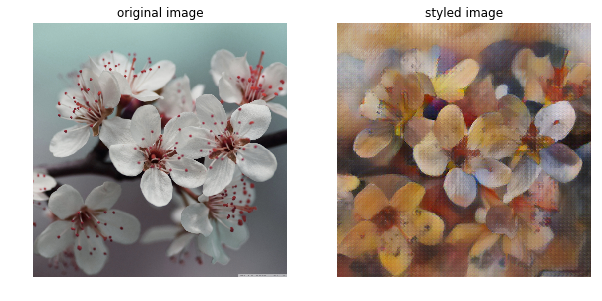

In [11]:
stylized_img = stylize(img, style, ['relu1_1', 'relu2_1', 'relu3_1', 'relu4_1', 'relu5_1'], 0.6)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title('original image')
axes[1].imshow(stylized_img)
axes[1].axis('off')
axes[1].set_title('styled image')

## Training decoders

To train the decoders, please download [MS COCO images](http://mscoco.org/dataset/#download) for content data first.
```shell
cd train_images 
wget http://images.cocodataset.org/zips/train2017.zip
unzip train2017.zip
cd ..
```

```shell
cd test_images 
wget http://images.cocodataset.org/zips/test2017.zip
unzip test2017.zip
cd ..
```

```shell
cd val_images 
wget http://images.cocodataset.org/zips/val2017.zip
unzip val2017.zip
cd ..
```

Here is an example of training process of the `decoder_relu2_1`. We calculate the loss on validation set every 100 iterations, if the validation loss is smaller than the one before, we save the current model. If the validation loss doesn't decrease for 5000 iterations, we stop the training process. 

Note, here to demostrate, the training process ends with 100000 iteration. It usually takes more than 50000 iterations to train the decoder (specially the deep model).

In [16]:
train_loss, val_loss = train_decoder('relu2_1', iters=10000, look_back_period=5000,
                                     train_imgs='train_images/train2017', val_imgs='val_images/val2017/', 
                                     checkpoint_dir='ckpts')

No checkpoint found, train from beginning
0 239.3436
Save best model
100 22.465216
Save best model
200 10.335157
Save best model
300 5.8753524
Save best model
400 4.7834344
Save best model
500 4.8668456
600 3.8702476
Save best model
700 3.7199314
Save best model
800 4.0890203
900 3.110314
Save best model
1000 2.8429964
Save best model
1100 2.7969408
Save best model
1200 2.6653323
Save best model
1300 2.3704379
Save best model
1400 2.3460264
Save best model
1500 2.1792698
Save best model
1600 2.0448072
Save best model
1700 1.9612092
Save best model
1800 1.7103063
Save best model
1900 1.7042845
Save best model
2000 1.752891
2100 1.5407587
Save best model
2200 1.5014713
Save best model
2300 1.4890553
Save best model
2400 1.3892558
Save best model
2500 1.3280464
Save best model
2600 1.280732
Save best model
2700 1.2394086
Save best model
2800 1.3241102
2900 1.2474527
3000 1.0716127
Save best model
3100 1.1471575
3200 0.97818506
Save best model
3300 1.0342385
3400 0.96032375
Save best model

Here is the loss on training and validation set:

Text(0.5, 1.0, 'Validation Loss')

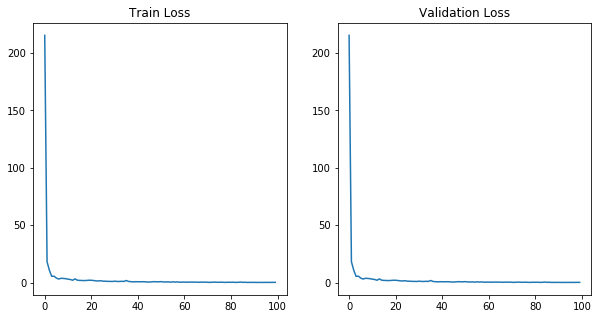

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].plot(train_loss)
axes[0].set_title('Train Loss')
axes[1].plot(train_loss)
axes[1].set_title('Validation Loss')